# Computational Methods in Physics (FIS810)
# UFPE - PPGFIS

## Week 5 - Random Walk

In [37]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
from math import factorial

# Plotting style

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

# Random Walk

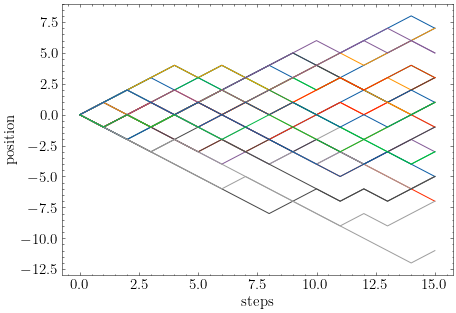

In [72]:
np.random.seed(0) # For reproducibility

N = 15 # steps
M = 30 # walkers
p = 0.5 # probability
a = 1.0 # step size

x = np.zeros((N+1, M))

for m in range(M):
    for n in range(N):
        if np.random.rand() >= p:
            x[n+1, m] = x[n, m] + a
        else:
            x[n+1, m] = x[n, m] - a
            
# Plotting

plt.plot(x)
plt.xlabel('steps')
plt.ylabel('position')
plt.show()

In [73]:
# Making it a function

def random_walk_1d(N, M, p=0.5, a=1.0):
    x = np.zeros((N+1, M))

    for m in range(M):
        for n in range(N):
            if np.random.rand() >= p:
                x[n+1, m] = x[n, m] + a
            else:
                x[n+1, m] = x[n, m] - a
    
    return x[-1,:]

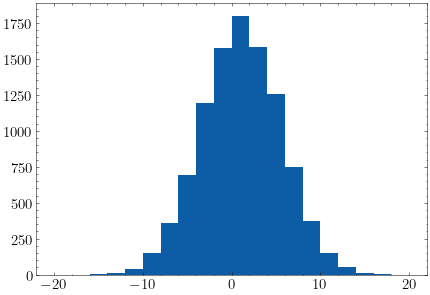

In [94]:
# Plotting the distribution

N = 20
M = 10000
p = 0.5
q = 1-p

m_values = [m for m in np.arange(-N, N+1, 1) if m%2 == 0]
x = random_walk_1d(N, M, p, a=1.0)

plt.hist(x, bins=m_values)
plt.show()

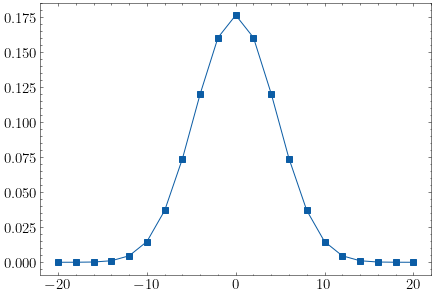

In [76]:
# Binomial distribution

def binomial(N, m, p=0.5):
    q = 1-p
    n1 = 0.5*(N+m)
    n2 = 0.5*(N-m)
    omega = (factorial(N))/(factorial(n1)*factorial(n2))
    return omega*(p**n1)*(q**n2)

m_values = [m for m in np.arange(-N, N+1, 1) if m%2 == 0]
P = [binomial(N, m) for m in m_values]

plt.plot(m_values, P, marker='s')
plt.show()

In [99]:
# Getting some statistics

x_mean = x.mean()
x_mean_exact = N*(p-q)

x2_mean = (x**2).mean()
x2_mean_exact = 0.0

variance = x2_mean - x_mean**2 # same as x.var()
variance_exact = 4*N*p*q

print(f'Mean: {x_mean} (expecting {x_mean_exact})')
print(f'Variance: {variance} (expecting {variance_exact})')

Mean: 0.0712 (expecting 0.0)
Variance: 19.90053056 (expecting 20.0)


In [116]:
# Make a plot of mean and variance as a function of M

N = 20
M_values = np.array([1000, 10000, 100000, 1000000])
mean_list = []
var_list = []

for M in M_values:
    x = random_walk_1d(N, M, p, a=1.0)
    mean_list.append(x.mean())
    var_list.append(x.var())

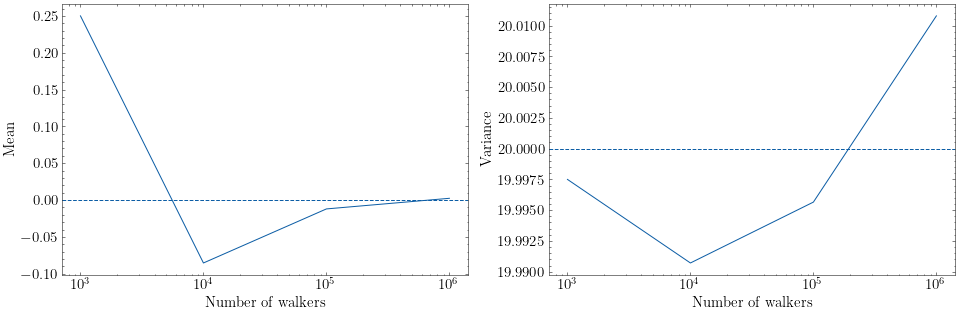

In [125]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.plot(M_values, mean_list)
plt.xscale('log')
plt.axhline(y=0.0, ls='--')
plt.xlabel('Number of walkers')
plt.ylabel('Mean')

plt.subplot(1,2,2)
plt.plot(M_values, var_list)
plt.xscale('log')
plt.axhline(y=20.0, ls='--')
plt.xlabel('Number of walkers')
plt.ylabel('Variance')

plt.show()

# 2D Random Walk

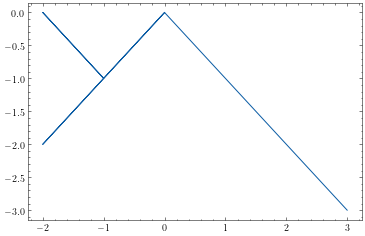

In [13]:
N = 10
M = 3
r = np.zeros((N, 2, M))

for m in range(M):
    for n in range(N-1):
        for coord in range(2):
            if np.random.rand() >= p:
                r[n+1, coord, m] = r[n, coord, m] + a
            else:
                r[n+1, coord, m] = r[n, coord, m] - a
            
        
plt.plot(r[:,0, 0], r[:,1, 0])

In [14]:
N = 10
r = np.zeros((N, 2))

for n in range(N-1):
    if np.random.random() <= 0.25:
        r[n+1, 0] = r[n, 0] + 1.0
    elif 0.25 < np.random.random() <= 0.5:
        r[n+1, 0] = r[n, 0] - 1.0
    elif 0.5 < np.random.random() <= 0.75:
        r[n+1, 1] = r[n, 1] + 1.0
    elif 0.75 < np.random.random():
        r[n+1, 1] = r[n, 1] - 1.0

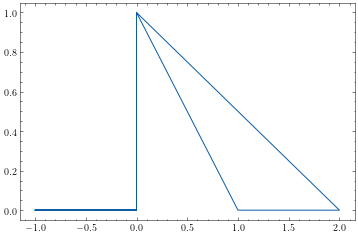

In [15]:
plt.plot(r[:, 0], r[:, 1])

In [16]:
for n in range(N-1):
    r = np.random.random() 
    if np.random.random() <= 0.25:
        r[n+1, 0] = r[n, 0] + 1.0
    elif 0.25 < np.random.random() <= 0.5:
        r[n+1, 0] = r[n, 0] - 1.0
    elif 0.5 < np.random.random() <= 0.75:
        r[n+1, 1] = r[n, 1] + 1.0
    elif 0.75 < np.random.random():
        r[n+1, 1] = r[n, 1] - 1.0

TypeError: 'float' object is not subscriptable

In [ ]:
for i in range(20):
    r = np.random.random()
    print(r)
    if r <= 0.25:
        print('left')
    elif 0.25 < r <= 0.5:
        print('right')
    elif 0.5 < r <= 0.75:
        print('up')
    elif 0.75 < r:
        print('down')